In [1]:
import interpretdl as it

In [2]:
it.__version__

'0.5.0'

# SG and Evalaution

/Users/lixuhong/codespace/github/InterpretDL/interpretdl/interpreter/abc_interpreter.py:83: UserWarning: ``use_cuda`` would be deprecated soon. Use ``device`` directly.
  Interpreter.__init__(self, paddle_model, device, use_cuda, **kwargs)


Paddle is not installed with GPU support. Change to CPU version now.


/Users/lixuhong/miniconda3/envs/pp2/lib/python3.7/site-packages/paddle/fluid/dygraph/varbase_patch_methods.py:392: UserWarning: 
tensor.grad will return the tensor value of the gradient. This is an incompatible upgrade for tensor.grad API.  It's return type changes from numpy.ndarray in version 2.0 to paddle.Tensor in version 2.1.0.  If you want to get the numpy value of the gradient, you can use :code:`x.grad.numpy()` 
  warnings.warn(warning_msg)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:42<00:00,  1.17it/s]


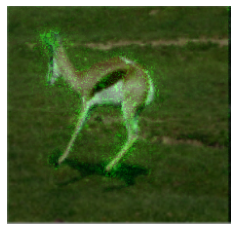

In [3]:
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)
img_path = 'assets/deer.png'
sg = it.SmoothGradInterpreter(paddle_model, use_cuda=True)
exp = sg.interpret(
        img_path, 
        noise_amount=0.1,
        visual=True, 
        labels=None, 
        save_path=None)

In [4]:
evaluator = it.DeletionInsertion(paddle_model, 'gpu:0', use_cuda=True)
r = evaluator.evaluate(img_path, exp)

/Users/lixuhong/codespace/github/InterpretDL/interpretdl/evaluate_interpreter/deletion_insertion.py:14: UserWarning: ``use_cuda`` would be deprecated soon. Use ``device`` directly.
  super().__init__(paddle_model, device, use_cuda, **kwargs)


Paddle is not installed with GPU support. Change to CPU version now.


# LIME and Evaluation

/Users/lixuhong/codespace/github/InterpretDL/interpretdl/interpreter/abc_interpreter.py:175: UserWarning: ``use_cuda`` would be deprecated soon. Use ``device`` directly.
  Interpreter.__init__(self, paddle_model, device, use_cuda, **kwargs)


Paddle is not installed with GPU support. Change to CPU version now.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [09:06<00:00,  3.66it/s]


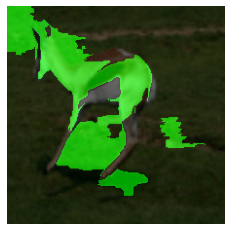

In [5]:
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)
img_path = 'assets/deer.png'
lime = it.LIMECVInterpreter(paddle_model, use_cuda=True)
lime_weights = lime.interpret(
    img_path,
    num_samples=2000,
    batch_size=50,
    visual=True,
    save_path=None
)

In [6]:
evaluator = it.DeletionInsertion(paddle_model, 'gpu:0', use_cuda=True)
r = evaluator.evaluate(img_path, lime.lime_results)

/Users/lixuhong/codespace/github/InterpretDL/interpretdl/evaluate_interpreter/deletion_insertion.py:14: UserWarning: ``use_cuda`` would be deprecated soon. Use ``device`` directly.
  super().__init__(paddle_model, device, use_cuda, **kwargs)


Paddle is not installed with GPU support. Change to CPU version now.


# Plots

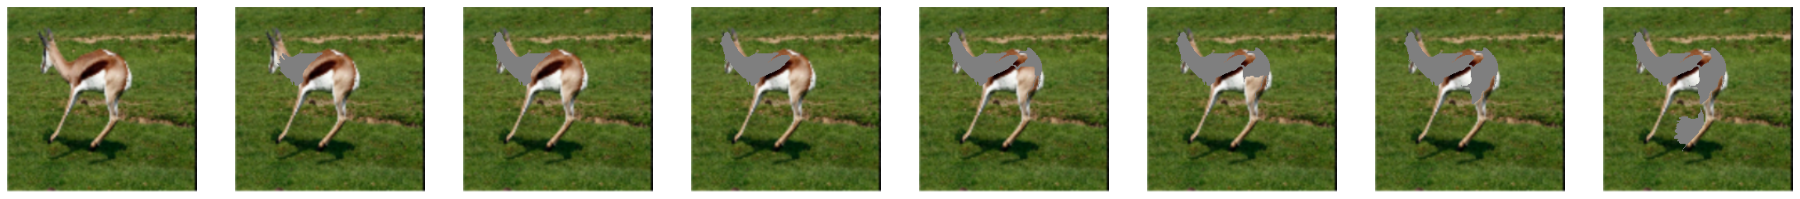

In [12]:
import matplotlib.pyplot as plt

psize = 4
show_images = 8
cols = show_images
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
for axis, img in zip(ax, r['deletion_images'][:show_images]):
    axis.axis('off')
    axis.imshow(img)
    
plt.show()

Text(0, 0.5, 'Probability')

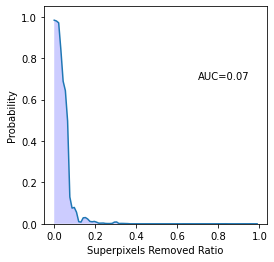

In [16]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(np.arange(len(r['del_probas'])) / len(r['del_probas']), r['del_probas'])
ax.text(0.7, 0.7, f"AUC={np.mean(r['del_probas']):.2f}")
ax.fill_between(x = np.arange(len(r['del_probas'])) / len(r['del_probas']),
                 y1 = 0,
                 y2 = r['del_probas'],
                 alpha = 0.2,
                 facecolor = 'blue')
ax.set_ylim((0, 1.05))
ax.set_xlabel('Superpixels Removed Ratio')
ax.set_ylabel('Probability')